In [ ]:
pip install datasets

In [ ]:
pip install accelerate -U

In [ ]:
pip install spacy es-core-news-sm


      Successfully uninstalled spacy-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.1.7 which is incompatible.
inflect 7.0.0 requires pydantic>=1.9.1, but you have pydantic 1.8.2 which is incompatible.


In [ ]:
pip install transformers[torch]

In [ ]:
import os
import pandas as pd
import numpy as np
from datasets import load_dataset
from datasets import load_metric
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, AlbertTokenizerFast, AlbertForSequenceClassification, Trainer
from huggingface_hub import login

NLP11_Customized Sentiment Analysis: Transfer Learning Using Tensorflow with Hugging Face.ipynb

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Train test split
from sklearn.model_selection import train_test_split

# Modeling
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Hugging Face Dataset
from datasets import Dataset

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

In [ ]:
# Training dataset
full_data = pd.read_csv('data.csv')
full_data

,Unnamed: 0,es,en,target
0,0,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,2
1,1,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,3
2,2,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,2
3,3,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,2
4,4,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,2
...,...,...,...,...
995,995,De nuevo vacio,Again empty,2
996,996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",1
997,997,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,2
998,998,LA VIDA ME MATAA,Life kills me,2


In [ ]:
full_data['target'] = full_data['target'].map({1: 0, 2: 1, 3: 2})

In [ ]:
full_data['target'].value_counts()

1    657
0    237
2    106
Name: target, dtype: int64

In [ ]:
import spacy
import pandas as pd

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Definir una función para lematizar el texto
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

# Aplicar la función de lematización a la columna 'es'
full_data['lemmatized_es'] = full_data['es'].apply(lemmatize_text)

# Mostrar el DataFrame con la columna lematizada
full_data

,Unnamed: 0,es,en,target,lemmatized_es
0,0,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,1,deberiar eliminar a el mala persona y a el que...
1,1,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,2,ya dejar de intentar contar él tu problema a a...
2,2,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,1,el tristeza ser él mas facil de ocultar de tod...
3,3,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,1,de el peor cosa de el depresion ser que no tú ...
4,4,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,1,el soledad ser él unico constante en mi vida ....
...,...,...,...,...,...
995,995,De nuevo vacio,Again empty,1,de nuevo vacio
996,996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",0,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...
997,997,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,1,cansado si mucho cansado de todo de el gente y...
998,998,LA VIDA ME MATAA,Life kills me,1,el VIDA ME MATAA


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_data['lemmatized_es'],
                                                    full_data['target'],
                                                    test_size=0.30,
                                                    random_state=42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 700 records.
The testing dataset has 300 records.


In [ ]:
X_train

541      ME ODIO , ODIO TODO DE MI . solo querer morir .
440    haber dias en el que yo sentir perfecta y que ...
482    este no él poder llamar vida si todo el dias y...
422    como yo gustariar que en vez de regalarme algo...
778                   ser normal que todo yo salir mal .
                             ...                        
106    no yo encerrar en mi cuarto porque yo gustar e...
270                                yo sentir ahogado ...
860                          ser uno decepcion para todo
435    mi depresion constar de dos parte , el " trist...
102    perdon por ser inestable , inseguro , timido ,...
Name: lemmatized_es, Length: 700, dtype: object

In [ ]:
y_train.value_counts()

1    464
0    156
2     80
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

1    193
0     81
2     26
Name: target, dtype: int64

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

tokenized_data_train = tokenizer(X_train.to_list(), return_tensors="np", padding=True)
tokenized_data_test = tokenizer(X_test.to_list(), return_tensors="np", padding=True)

labels_train = np.array(y_train)
labels_test = np.array(y_test)

print(tokenized_data_train["input_ids"][0])

[    4 15154 30605  7232  1017 30605  7232 20029 30985  1982 13024  1009
  1942  9312  3746  1009     5     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from transformers import TFAutoModelForSequenceClassification


In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=3)

input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name="attention_mask")

bert_output = model(input_ids, attention_mask=attention_mask)[0]

dense_output = Dense(8, activation='relu')(bert_output)

dropout_rate = 0.1
dropout_output_2 = Dropout(dropout_rate)(dense_output)
num_classes = 3

output = Dense(num_classes, activation='softmax')(dropout_output_2)

new_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

new_model.layers[2].trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
new_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = new_model.fit(
    {"input_ids": tokenized_data_train["input_ids"], "attention_mask": tokenized_data_train["attention_mask"]},
    labels_train,
    validation_data=({"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]}, labels_test),
    batch_size=30,
    epochs=40
)

test_loss, test_acc = new_model.evaluate(
    {"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]},
    labels_test
)
print("Test Accuracy:", test_acc)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 15s 135ms/step - loss: 1.1324 - accuracy: 0.2229 - val_loss: 1.1237 - val_accuracy: 0.2700
Epoch 2/40
24/24 [==============================] - 1s 59ms/step - loss: 1.1286 - accuracy: 0.2414 - val_loss: 1.1210 - val_accuracy: 0.2700
Epoch 3/40
24/24 [==============================] - 1s 59ms/step - loss: 1.1269 - accuracy: 0.2414 - val_loss: 1.1183 - val_accuracy: 0.2700
Epoch 4/40
24/24 [==============================] - 1s 58ms/step - loss: 1.1250 - accuracy: 0.2343 - val_loss: 1.1156 - val_accuracy: 0.2700
Epoch 5/40
24/24 [==============================] - 1s 60ms/step - loss: 1.1210 - accuracy: 0.2314 - val_loss: 1.1130 - val_accuracy: 0.2700
Epoch 6/40
24/24 [==============================] - 1s 61ms/step - loss: 1.1222 - accuracy: 0.2257 - val_loss: 1.1105 - val_accuracy: 0.2700
Epoch 7/40
24/24 [==============================] - 1s 59ms/step - loss: 1.1199 - accuracy: 0.2329 - val_loss: 1.1079 - val_accuracy: 0.2700
Epoch 8/40
24/24 [====

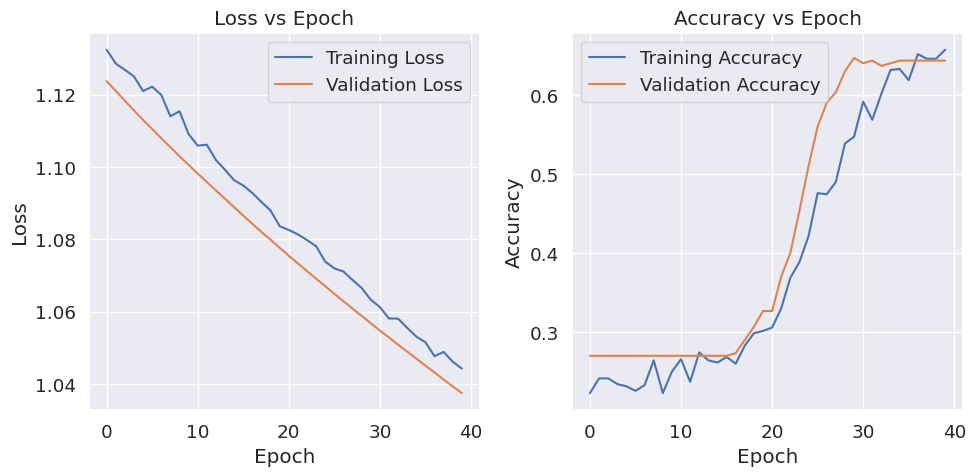

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
y_test_predict = new_model.predict(dict(tokenized_data_test))

y_test_predict[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


10/10 [==============================] - 3s 46ms/step


array([[0.33614904, 0.37451524, 0.28933576],
       [0.33896464, 0.3765699 , 0.28446546],
       [0.338706  , 0.37641612, 0.2848779 ],
       [0.33159083, 0.36863765, 0.29977146],
       [0.33574745, 0.37354153, 0.290711  ]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

y_pred_bool = np.argmax(y_test_predict, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.64      1.00      0.78       193
           2       0.00      0.00      0.00        26

    accuracy                           0.64       300
   macro avg       0.21      0.33      0.26       300
weighted avg       0.41      0.64      0.50       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(y_test_predict, axis=1)

conf_matrix = confusion_matrix(labels_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[  0  81   0]
 [  0 193   0]
 [  0  26   0]]


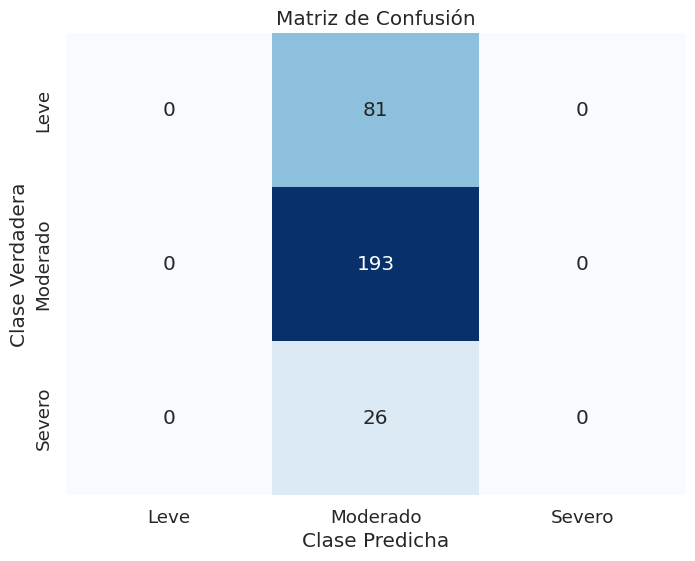

In [ ]:

import seaborn as sns

classes = ["Leve", "Moderado", "Severo"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes[::1])

# Añade etiquetas y título
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')

# Muestra la figura
plt.show()



In [ ]:
y_test_class_preds = np.argmax(y_test_predict, axis=1)

y_test_class_preds[:5]

array([1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_test_class_preds, y_test)

0.6433333333333333

In [ ]:
input_sentence = "TMe siento horrible, quiero morir!"

tokenized_input = tokenizer(input_sentence, return_tensors="np", padding=True)

output =  new_model.predict(dict(tokenized_input))

probabilities = tf.nn.softmax(output)
predicted_class = np.argmax(probabilities)

print("Predicted class:", predicted_class)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


1/1 [==============================] - 3s 3s/step
Predicted class: 1


----------------------------------------------------
#Desbalanceo

##Ajuste de Parámetros del modelo

###8e5

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

print(class_weights)


[1.4957265  0.50287356 2.91666667]


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

tokenized_data_train = tokenizer(X_train.to_list(), return_tensors="np", padding=True)
tokenized_data_test = tokenizer(X_test.to_list(), return_tensors="np", padding=True)

labels_train = np.array(y_train)
labels_test = np.array(y_test)

print(tokenized_data_train["input_ids"][0])

[    4 15154 30605  7232  1017 30605  7232 20029 30985  1982 13024  1009
  1942  9312  3746  1009     5     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1]


In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=3)

input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name="attention_mask")

bert_output = model(input_ids, attention_mask=attention_mask)[0]

dense_output = Dense(8, activation='relu')(bert_output)

dropout_rate = 0.1
dropout_output_2 = Dropout(dropout_rate)(dense_output)
num_classes = 3

output = Dense(num_classes, activation='softmax')(dropout_output_2)

new_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

new_model.layers[2].trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=8e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
new_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = new_model.fit(
    {"input_ids": tokenized_data_train["input_ids"], "attention_mask": tokenized_data_train["attention_mask"]},
    labels_train,
    validation_data=({"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]}, labels_test),
    batch_size=10,
    epochs=30,
    class_weight=dict(enumerate(class_weights))
)

test_loss, test_acc = new_model.evaluate(
    {"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]},
    labels_test
)
print("Test Accuracy:", test_acc)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 [==============================] - 12s 44ms/step - loss: 1.1006 - accuracy: 0.3800 - val_loss: 1.0928 - val_accuracy: 0.4333
Epoch 2/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0998 - accuracy: 0.4329 - val_loss: 1.0930 - val_accuracy: 0.4400
Epoch 3/30
70/70 [==============================] - 1s 20ms/step - loss: 1.1004 - accuracy: 0.4329 - val_loss: 1.0930 - val_accuracy: 0.4400
Epoch 4/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1005 - accuracy: 0.4271 - val_loss: 1.0935 - val_accuracy: 0.4333
Epoch 5/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1020 - accuracy: 0.4114 - val_loss: 1.0938 - val_accuracy: 0.4267
Epoch 6/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0986 - accuracy: 0.4129 - val_loss: 1.0937 - val_accuracy: 0.4267
Epoch 7/30
70/70 [==============================] - 1s 20ms/step - loss: 1.0990 - accuracy: 0.4171 - val_loss: 1.0938 - val_accuracy: 0.4333
Epoch 8/30
70/70 [=====

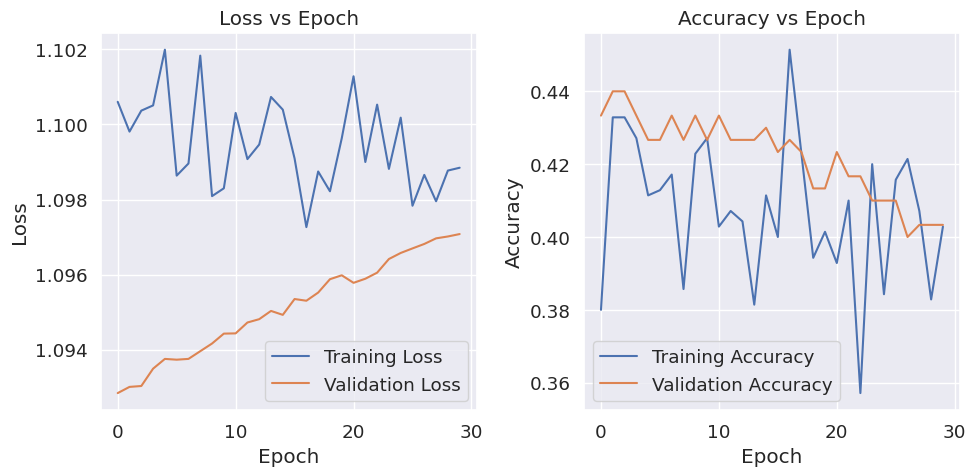

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
y_test_predict = new_model.predict(dict(tokenized_data_test))

y_test_predict[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


10/10 [==============================] - 3s 42ms/step


array([[0.33785322, 0.33421546, 0.32793126],
       [0.33477092, 0.34267965, 0.32254946],
       [0.33388257, 0.34585017, 0.3202673 ],
       [0.33249673, 0.3262419 , 0.34126136],
       [0.33557782, 0.33686993, 0.32755232]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(y_test_predict, axis=1)

conf_matrix = confusion_matrix(labels_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[24 39 18]
 [41 93 59]
 [ 9 13  4]]


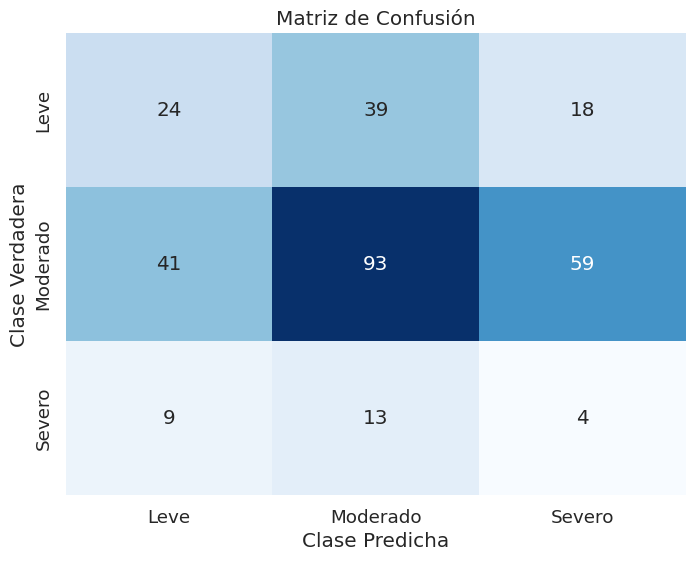

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = ["Leve", "Moderado", "Severo"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes[::])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')


plt.show()



###5e5

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

tokenized_data_train = tokenizer(X_train.to_list(), return_tensors="np", padding=True)
tokenized_data_test = tokenizer(X_test.to_list(), return_tensors="np", padding=True)

labels_train = np.array(y_train)
labels_test = np.array(y_test)

print(tokenized_data_train["input_ids"][0])

[    4 15154 30605  7232  1017 30605  7232 20029 30985  1982 13024  1009
  1942  9312  3746  1009     5     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1]


In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=3)

input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name="attention_mask")

bert_output = model(input_ids, attention_mask=attention_mask)[0]

dense_output = Dense(8, activation='relu')(bert_output)

dropout_rate = 0.1
dropout_output_2 = Dropout(dropout_rate)(dense_output)
num_classes = 3

output = Dense(num_classes, activation='softmax')(dropout_output_2)

new_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

new_model.layers[2].trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
new_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = new_model.fit(
    {"input_ids": tokenized_data_train["input_ids"], "attention_mask": tokenized_data_train["attention_mask"]},
    labels_train,
    validation_data=({"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]}, labels_test),
    batch_size=10,
    epochs=30,
    class_weight=dict(enumerate(class_weights))
)

test_loss, test_acc = new_model.evaluate(
    {"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]},
    labels_test
)
print("Test Accuracy:", test_acc)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 [==============================] - 11s 45ms/step - loss: 1.0991 - accuracy: 0.2129 - val_loss: 1.1116 - val_accuracy: 0.1800
Epoch 2/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0986 - accuracy: 0.2243 - val_loss: 1.1113 - val_accuracy: 0.1800
Epoch 3/30
70/70 [==============================] - 1s 20ms/step - loss: 1.1016 - accuracy: 0.1957 - val_loss: 1.1112 - val_accuracy: 0.1800
Epoch 4/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0989 - accuracy: 0.2200 - val_loss: 1.1110 - val_accuracy: 0.1867
Epoch 5/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0992 - accuracy: 0.2357 - val_loss: 1.1108 - val_accuracy: 0.1800
Epoch 6/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0983 - accuracy: 0.2214 - val_loss: 1.1106 - val_accuracy: 0.1867
Epoch 7/30
70/70 [==============================] - 1s 19ms/step - loss: 1.0988 - accuracy: 0.2200 - val_loss: 1.1103 - val_accuracy: 0.1867
Epoch 8/30
70/70 [=====

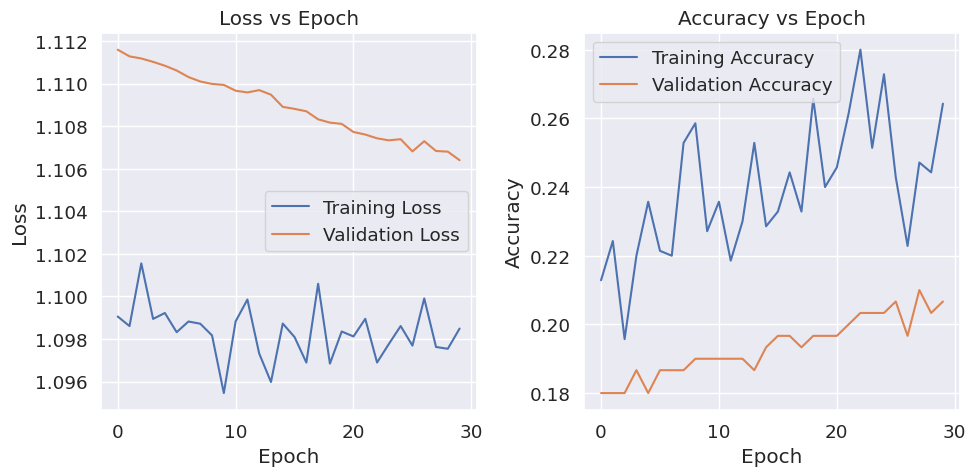

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
from sklearn.metrics import classification_report

y_pred_bool = np.argmax(y_test_predict, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.32      0.30      0.31        81
           1       0.64      0.48      0.55       193
           2       0.05      0.15      0.07        26

    accuracy                           0.40       300
   macro avg       0.34      0.31      0.31       300
weighted avg       0.50      0.40      0.44       300



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(y_test_predict, axis=1)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(labels_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[24 39 18]
 [41 93 59]
 [ 9 13  4]]


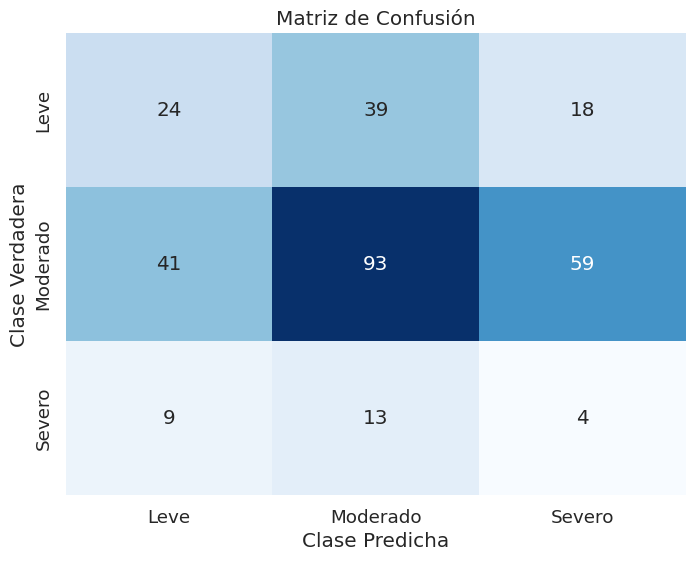

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = ["Leve", "Moderado", "Severo"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes[::])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')

plt.show()



###2e5

In [ ]:

tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

tokenized_data_train = tokenizer(X_train.to_list(), return_tensors="np", padding=True)
tokenized_data_test = tokenizer(X_test.to_list(), return_tensors="np", padding=True)

labels_train = np.array(y_train)
labels_test = np.array(y_test)


print(tokenized_data_train["input_ids"][0])

[    4 15154 30605  7232  1017 30605  7232 20029 30985  1982 13024  1009
  1942  9312  3746  1009     5     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1]


In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=3)

input_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name="attention_mask")

bert_output = model(input_ids, attention_mask=attention_mask)[0]

dense_output = Dense(8, activation='relu')(bert_output)

dropout_rate = 0.1
dropout_output_2 = Dropout(dropout_rate)(dense_output)
num_classes = 3

output = Dense(num_classes, activation='softmax')(dropout_output_2)

new_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

new_model.layers[2].trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
new_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = new_model.fit(
    {"input_ids": tokenized_data_train["input_ids"], "attention_mask": tokenized_data_train["attention_mask"]},
    labels_train,
    validation_data=({"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]}, labels_test),
    batch_size=10,
    epochs=30,
    class_weight=dict(enumerate(class_weights))
)

test_loss, test_acc = new_model.evaluate(
    {"input_ids": tokenized_data_test["input_ids"], "attention_mask": tokenized_data_test["attention_mask"]},
    labels_test
)
print("Test Accuracy:", test_acc)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 [==============================] - 12s 46ms/step - loss: 1.1010 - accuracy: 0.6486 - val_loss: 1.0594 - val_accuracy: 0.6433
Epoch 2/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1022 - accuracy: 0.6500 - val_loss: 1.0596 - val_accuracy: 0.6433
Epoch 3/30
70/70 [==============================] - 1s 20ms/step - loss: 1.1015 - accuracy: 0.6443 - val_loss: 1.0598 - val_accuracy: 0.6433
Epoch 4/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1009 - accuracy: 0.6443 - val_loss: 1.0602 - val_accuracy: 0.6433
Epoch 5/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1002 - accuracy: 0.6457 - val_loss: 1.0604 - val_accuracy: 0.6433
Epoch 6/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1018 - accuracy: 0.6514 - val_loss: 1.0607 - val_accuracy: 0.6433
Epoch 7/30
70/70 [==============================] - 1s 19ms/step - loss: 1.1030 - accuracy: 0.6514 - val_loss: 1.0609 - val_accuracy: 0.6433
Epoch 8/30
70/70 [=====

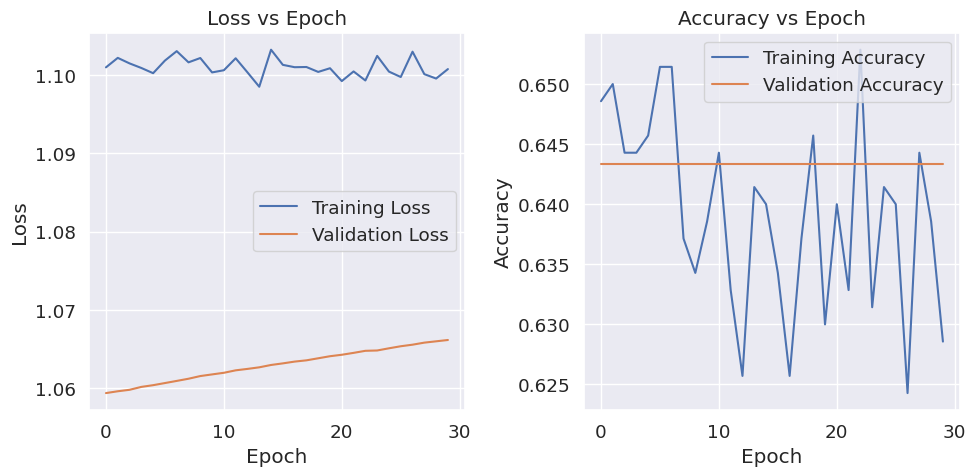

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
from sklearn.metrics import classification_report

y_pred_bool = np.argmax(y_test_predict, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.32      0.30      0.31        81
           1       0.64      0.48      0.55       193
           2       0.05      0.15      0.07        26

    accuracy                           0.40       300
   macro avg       0.34      0.31      0.31       300
weighted avg       0.50      0.40      0.44       300



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(y_test_predict, axis=1)

conf_matrix = confusion_matrix(labels_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[24 39 18]
 [41 93 59]
 [ 9 13  4]]


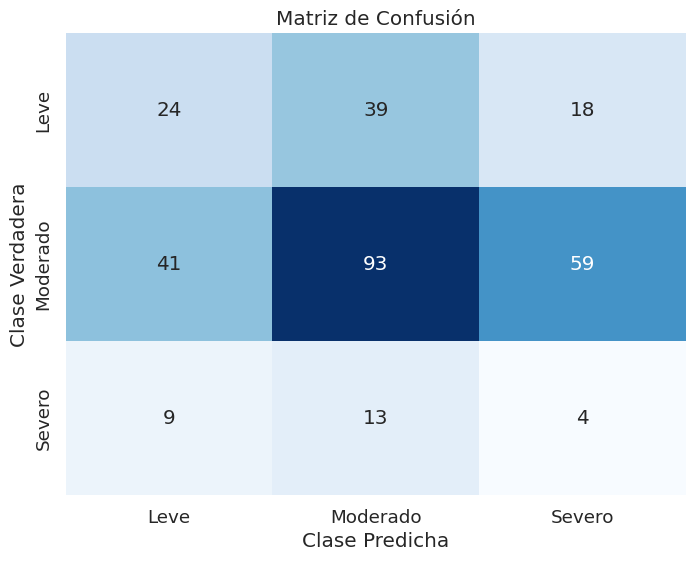

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = ["Leve", "Moderado", "Severo"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes[::])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')

plt.show()

